# Clean and Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). 

## Goals

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

# Summary of Results

After analyzing the data, we conclude that:
* Employees who are well establish in the both DETE and TAFE, are more likely to resign due to dissatisfaction.
* Older employees (41 years old or older) more likely to resign due to dissatisfaction.
* Finally, employees of DETE are more likely to resign due to dissatisfaction.

For more details, please refer to the the full analysis below.

## Introduction

First, we'll read in the datasets and do some initial exporation.

In [82]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')

#Quick exploration of the data
pd.options.display.max_columns = 150 # to avoid truncated output 
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [83]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [84]:
tafe_survey = pd.read_csv('tafe_survey.csv')

In [85]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [86]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [87]:
tafe_survey.isnull()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

We can make the following observations based on the work above:

* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
* Both the dete_survey and tafe_survey contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Identify Missing Values and Drop Unneccessary Columns

First, we'll correct the Not Stated values and drop some of the columns we don't need for our analysis.

In [88]:
# Read in the data again, but this time read `Not Stated` values as `NaN`
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

# Quick exploration of the data
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In the "dete_survey" dataset columns 28 to 48, and in the "tafe_survey" dataset, columns 17 to 65 all indicates that the  employee resigned because they were dissatisfied. These columns are redundant and cant be dropped

In [89]:
# Remove columns we don't need for our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

## Rename Columns

Next, we'll standardize the names of the columns we want to work with, because we eventually want to combine the dataframes.

In [90]:
#Check that the columns were dropped
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

In [91]:
# reformatting the column names of dete_survey dataset
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(" ", "_").str.strip().str.lower()
# Check that the column names were updated correctly
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [92]:
# Update column names to match the names in dete_survey_updated
mapping_dict = {
'Record ID':'id',
'CESSATION YEAR':'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
}
tafe_survey_updated = tafe_survey_updated.rename(mapping_dict, axis = 1)  
# Check that the specified column names were updated correctly
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Filter the Data

In [93]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [94]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

Note that dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

To account for each of these variations so we don't unintentionally drop data, we will update all separation types containing the word "resignation" to 'Resignation'.

In [95]:
# Update all separation types containing the word "resignation" to 'Resignation'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [96]:
# Select only the resignation separation types from each dataframe
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
# .copy() to avoid SettingWithCopy Warning.

## Verify the Data

Before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies. 
We'll focus on verifying that the years in the cease_date and dete_start_date columns make sense. We'll use the following criteria:

* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [97]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [98]:
# Extract the years and convert them to a float type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

# Check the values again and look for outliers
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [101]:
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [99]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending= True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

We can see that the years in both dataframes don't completely align:
* The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. 
* The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. 

Since we aren't concerned with analyzing the results by year, we'll leave them as is.

Since our goal is to answer the question below, we need a column containing the length of time an employee spent in their workplace, or years of service, in both dataframes.

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

The tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service.

Below, we calculate the years of service in the dete_survey_updated dataframe by subtracting the dete_start_date from the cease_date and create a new column named institute_service.

In [105]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
# Quick check of the result
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identify Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

1. tafe_survey_updated:
    * Contributing Factors. Dissatisfaction
    * Contributing Factors. Job Dissatisfaction
    
2. dafe_survey_updated:
    * job_dissatisfaction
    * dissatisfaction_with_the_department
    * physical_work_environment
    * lack_of_recognition
    * lack_of_job_security
    * work_location
    * employment_conditions
    * work_life_balance
    * workload
    
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

True: indicates a person resigned because they were dissatisfied in some way
False: indicates a person resigned because of a reason other than dissatisfaction with the job
NaN: indicates the value is missing

In [108]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [109]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [115]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else: 
        return True

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
   
# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [116]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data

Below, we'll add an institute column so that we can differentiate the data from each survey after we combine them. Then, we'll combine the dataframes and drop any remaining columns we don't need.

In [117]:
# Add an institute column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [126]:
# combine the datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)
# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [164]:
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
separationtype       651
institute            651
dtype: int64

## Clean the Service Column

In [182]:
combined_updated['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
12.0                   6
10.0                   6
14.0                   6
22.0                   6
17.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


In [183]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts(dropna = False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [184]:
def map_service(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return "New"
    elif 3 <= val <= 6:
        return "Experienced"
    elif 7 <= val <= 10:
        return "Established"
    else:
        return "Veteran"

In [185]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(map_service)
combined_updated['service_cat'].value_counts(dropna = False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## ## Analyzing resgined due dissatisfaction in each experience group

In [186]:
# Verify the unique values
combined_updated['dissatisfied'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [187]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

Text(0.5, 1.0, 'Dissatisfaction by Experience')

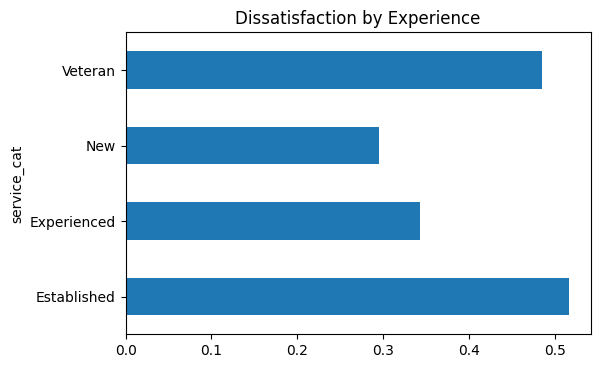

In [210]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_cat_pivot = pd.pivot_table(combined_updated, index ='service_cat', values = 'dissatisfied')
# plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
dis_cat_pivot.plot(kind = "barh", legend = False)
plt.title('Dissatisfaction by Experience')

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service.

## Analyzing resgined due dissatisfaction in each age group

In [189]:
combined_updated['age'].value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [190]:
# Extract the years of service and convert the type to float
combined_updated['age_up'] = combined_updated['age'].astype('str').str.extract(r'(\d+)')
combined_updated['age_up'] = combined_updated['age_up'].astype('float')

# Check the years extracted are correct
combined_updated['age_up'].value_counts(dropna = False).sort_index()

20.0    10
21.0    62
26.0    67
31.0    61
36.0    73
41.0    93
46.0    81
51.0    71
56.0    55
61.0    23
NaN     55
Name: age_up, dtype: int64

In [191]:
# Replace missing values with the mean of age_up column:
combined_updated['age_up'] = combined_updated['age_up'].fillna(combined_updated['age_up'].mean())
combined_updated['age_up'].value_counts(dropna = False)

41.000000    93
46.000000    81
36.000000    73
51.000000    71
26.000000    67
21.000000    62
31.000000    61
39.271812    55
56.000000    55
61.000000    23
20.000000    10
Name: age_up, dtype: int64

In [200]:
def age_map(val):
    if pd.isnull(val):
        return np.null
    elif val <= 26:
        return "26 or younger"
    elif 26 < val <= 41:
        return "26-41"
    elif 41 < val < 56:
        return "41-56"
    else:
        return "56 or older"
    

In [201]:
combined_updated['age_cat'] = combined_updated['age_up'].apply(age_map)
combined_updated['age_cat'].value_counts(dropna = False)

26-41            282
41-56            152
26 or younger    139
56 or older       78
Name: age_cat, dtype: int64

Text(0.5, 1.0, 'Dissatisfaction by Age Group')

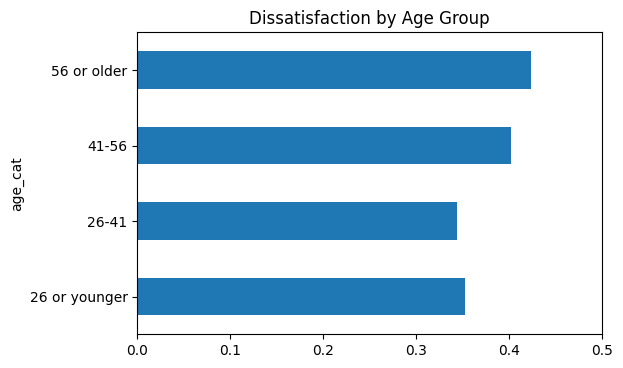

In [209]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_age_pivot = pd.pivot_table(combined_updated, index ='age_cat', values = 'dissatisfied')
# plotting the results
%matplotlib inline
dis_age_pivot.plot(kind = "barh", legend = False, xlim = (0, 0.5))
plt.title('Dissatisfaction by Age Group')


We can see that conclude that employees that are older than 41 years old are more likely to resign due to some kind of dissatisfaction with the job than the younger employees.

Combining with the observation between experience and dissatisfaction. It looks like that more senior the employees (in term of both age and experience) are more likely to resign due to dissatisfaction with the job.

## ## Analyzing resgined due dissatisfaction in each Institude

Text(0.5, 1.0, 'Dissatisfaction by Institude')

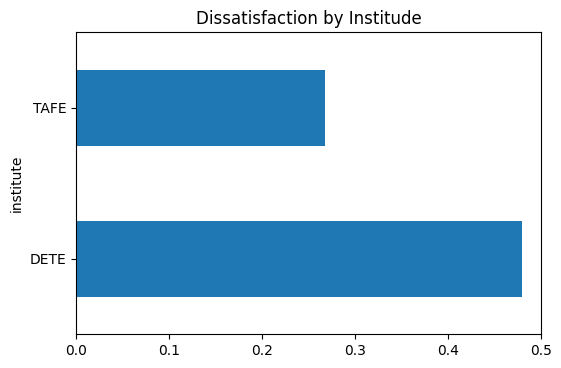

In [213]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_age_pivot = pd.pivot_table(combined_updated, index ='institute', values = 'dissatisfied')
%matplotlib inline
dis_age_pivot.plot(kind = "barh", legend = False, xlim = (0, 0.5))
plt.title('Dissatisfaction by Institude')

The amount employees in the DETE institude that end their employment because they were dissatisfied in some way are at least double that of TAFE

# Conclusion


After cleaning, and analyzing the two dataframes including datas from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) we can conclude the following:
* Most of the resignations due to dissatisfaction are among employees who have been working for 7 or more years in the institutes
* If we categorize by age group, we can see that the employees who are 41 or older are the vast majority of the ones who resigned for dissatisfaction
* Among the two institutes, the amount employees who worked for DETE resign due to dissatisfaction are at least double that of the TAFE institude. This may suggest that the working condition at DETE is worse than TAFE.